# Description

This notebook is used to request computation of average time-series of a WaPOR data layer for an area using WaPOR API.

You will need WaPOR API Token to use this notebook 

# Step 1: Read APIToken

Get your APItoken from https://wapor.apps.fao.org/profile. Enter your API Token when running the cell below.

In [1]:
import requests
import pandas as pd

path_query=r'https://io.apps.fao.org/gismgr/api/v1/query/'
path_sign_in=r'https://io.apps.fao.org/gismgr/api/v1/iam/sign-in/'

APIToken=input('Your API token: ')

Your API token: Enter your API token


# Step 2: Get Authorization AccessToken

Using the input API token to get AccessToken for authorization

In [2]:
resp_signin=requests.post(path_sign_in,headers={'X-GISMGR-API-KEY':APIToken})
resp_signin = resp_signin.json()
AccessToken=resp_signin['response']['accessToken']
AccessToken

'eyJhbGciOiJSUzI1NiIsImtpZCI6IjIxODQ1OWJiYTE2NGJiN2I5MWMzMjhmODkxZjBiNTY1M2UzYjM4YmYiLCJ0eXAiOiJKV1QifQ.eyJuYW1lIjoiQmljaCBUcmFuIiwicGljdHVyZSI6Imh0dHBzOi8vbGg0Lmdvb2dsZXVzZXJjb250ZW50LmNvbS8tQkxvTDhOYUVLNm8vQUFBQUFBQUFBQUkvQUFBQUFBQUFCTDgvMlFJTzFRQUlxbW8vcGhvdG8uanBnIiwiaXNzIjoiaHR0cHM6Ly9zZWN1cmV0b2tlbi5nb29nbGUuY29tL3VuZmFvLWFwcHMtZGV2IiwiYXVkIjoidW5mYW8tYXBwcy1kZXYiLCJhdXRoX3RpbWUiOjE1OTQ4MDgyNjYsInVzZXJfaWQiOiJSNk5Ibkd5dDRUT3p1M212T2tteE04UkxFMnUxIiwic3ViIjoiUjZOSG5HeXQ0VE96dTNtdk9rbXhNOFJMRTJ1MSIsImlhdCI6MTU5NDgwODI2NiwiZXhwIjoxNTk0ODExODY2LCJlbWFpbCI6ImJpY2h0bjk0QGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJmaXJlYmFzZSI6eyJpZGVudGl0aWVzIjp7Imdvb2dsZS5jb20iOlsiMTAyMTY0MjA1NjAzMjU1NDMxMjQzIl0sImVtYWlsIjpbImJpY2h0bjk0QGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6ImN1c3RvbSJ9fQ.FCcDFbDO-mCDvY3Rt4266SxeU3ez3_56KZRhnxXakq9J2a1wL0ML54b-ufmfcdmqM0fzuAaHKiV9GkLT1JuexFPz0XP_xD5zc-L2kt36jPsdkFjDOK9cQygAcwor1wiXrAy7PVk8N6aQE27AAK_iTbkCgNaRNzMKO3vgJLK_M5ntHvmjs0NGWGdidAnu2OzbnhIAFczsFWty_35Mk

# Step 3: Write Query Payload

For more examples of areatimeseries query load 
visit https://io.apps.fao.org/gismgr/api/v1/swagger-ui/examples/AreaStatsTimeSeries.txt

In [3]:
crs="EPSG:4326" #coordinate reference system
cube_code="L1_PCP_E"
workspace='WAPOR_2'
start_date="2009-01-01"
end_date="2019-01-01"

#get datacube measure
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/measures'
resp=requests.get(cube_url).json()
measure=resp['response']['items'][0]['code']
print('MEASURE: ',measure)

#get datacube time dimension
cube_url=f'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/{workspace}/cubes/{cube_code}/dimensions'
resp=requests.get(cube_url).json()
items=pd.DataFrame.from_dict(resp['response']['items'])
dimension=items[items.type=='TIME']['code'].values[0]
print('DIMENSION: ',dimension)

MEASURE:  WATER_MM
DIMENSION:  DAY


## Define area by coordinate extent

In [4]:
bbox= [37.95883206252312, 7.89534, 43.32093, 12.3873979377346] #latlon
xmin,ymin,xmax,ymax=bbox[0],bbox[1],bbox[2],bbox[3]
Polygon=[
          [xmin,ymin],
          [xmin,ymax],
          [xmax,ymax],
          [xmax,ymin],
          [xmin,ymin]
        ]
query_areatimeseries={
  "type": "AreaStatsTimeSeries",
  "params": {
    "cube": {
      "code": cube_code, #cube_code
      "workspaceCode": workspace, #workspace code: use WAPOR for v1.0 and WAPOR_2 for v2.1
      "language": "en"
    },
    "dimensions": [
      {
        "code": dimension, #use DAY DEKAD MONTH or YEAR
        "range": f"[{start_date},{end_date})" #start date and endate
      }
    ],
    "measures": [
      measure
    ],
    "shape": {
      "type": "Polygon",
      "properties": {
      "name": crs #coordinate reference system
              },
      "coordinates": [
       Polygon
      ]
    }
  }
}

query_areatimeseries

{'type': 'AreaStatsTimeSeries',
 'params': {'cube': {'code': 'L1_PCP_E',
   'workspaceCode': 'WAPOR_2',
   'language': 'en'},
  'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
  'measures': ['WATER_MM'],
  'shape': {'type': 'Polygon',
   'properties': {'name': 'EPSG:4326'},
   'coordinates': [[[37.95883206252312, 7.89534],
     [37.95883206252312, 12.3873979377346],
     [43.32093, 12.3873979377346],
     [43.32093, 7.89534],
     [37.95883206252312, 7.89534]]]}}}

## OR define area by reading GeoJSON

In [5]:
import ogr
shp_fh=r".\data\Awash_shapefile.shp"

shpfile=ogr.Open(shp_fh)
layer=shpfile.GetLayer()
epsg_code=layer.GetSpatialRef().GetAuthorityCode(None)
shape=layer.GetFeature(0).ExportToJson(as_object=True)['geometry'] #get geometry of shapefile in JSON string
shape["properties"]={"name": "EPSG:{0}".format(epsg_code)}#latlon projection            

query_areatimeseries={
  "type": "AreaStatsTimeSeries",
  "params": {
    "cube": {
      "code": cube_code,
      "workspaceCode": workspace,
      "language": "en"
    },
    "dimensions": [
      {
        "code": dimension,
        "range": f"[{start_date},{end_date})"
      }
    ],
    "measures": [
      measure
    ],
    "shape": shape
  }
}

query_areatimeseries

{'type': 'AreaStatsTimeSeries',
 'params': {'cube': {'code': 'L1_PCP_E',
   'workspaceCode': 'WAPOR_2',
   'language': 'en'},
  'dimensions': [{'code': 'DAY', 'range': '[2009-01-01,2019-01-01)'}],
  'measures': ['WATER_MM'],
  'shape': {'type': 'Polygon',
   'coordinates': [[[40.849702254901956, 12.3873979377346],
     [40.85466256751757, 12.3873979377346],
     [40.85466256751757, 12.379461439611392],
     [40.85863081761006, 12.379461439611392],
     [40.85863081761006, 12.374501128284388],
     [40.86656731779504, 12.374501128284388],
     [40.86656731779504, 12.366564630161182],
     [40.87053556788753, 12.366564630161182],
     [40.87053556788753, 12.36259638109958],
     [40.875495880503145, 12.36259638109958],
     [40.875495880503145, 12.34969957164937],
     [40.88740063078061, 12.34969957164937],
     [40.88740063078061, 12.345731322587767],
     [40.8913688808731, 12.345731322587767],
     [40.8913688808731, 12.341763073526163],
     [40.89632919348871, 12.341763073526163],


# Step 4: Post the QueryPayload with AccessToken in Header 

In responses, get an url to query job. 

In [6]:
resp_query=requests.post(path_query,headers={'Authorization':'Bearer {0}'.format(AccessToken)},
                                          json=query_areatimeseries)
resp_query = resp_query.json()
job_url=resp_query['response']['links'][0]['href']

job_url

'https://io.apps.fao.org/gismgr/api/v1/catalog/workspaces/WAPOR_2/jobs/ef9d2109-a870-4faa-a669-d132233d2e5d'

# Step 5: Get Job Results.

It will take some time for the job to be finished. When the job is finished, its status will be changed from 'RUNNING' to 'COMPLETED' or 'COMPLETED WITH ERRORS'. If it is COMPLETED, the area time series results can be achieved from Response 'output'.

In [7]:
i=0
print('RUNNING',end=" ")
while i==0:        
    resp = requests.get(job_url)
    resp=resp.json()
    
    if resp['response']['status']=='RUNNING':
        print('.',end =" ")
    if resp['response']['status']=='COMPLETED':
        results=resp['response']['output']
        df=pd.DataFrame(results['items'],columns=results['header'])
        i=1
    if resp['response']['status']=='COMPLETED WITH ERRORS':
        print(resp['response']['log'])
        i=1       
df

RUNNING . . . . . . . . . . . . . . 

,day,avg,min,max,range
0,2009-01-01,0.000000,0.0,0.0,0.0
1,2009-01-02,0.000000,0.0,0.0,0.0
2,2009-01-03,0.000000,0.0,0.0,0.0
3,2009-01-04,0.000000,0.0,0.0,0.0
4,2009-01-05,0.000000,0.0,0.0,0.0
5,2009-01-06,0.000000,0.0,0.0,0.0
6,2009-01-07,0.000000,0.0,0.0,0.0
7,2009-01-08,0.000000,0.0,0.0,0.0
8,2009-01-09,0.000000,0.0,0.0,0.0
9,2009-01-10,0.000000,0.0,0.0,0.0


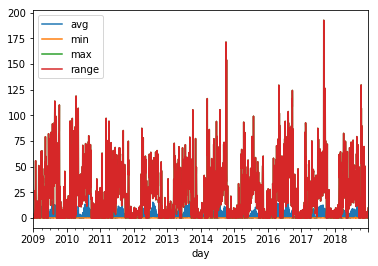

In [9]:
df.index=pd.to_datetime(df.day,format='%Y-%m-%d')
df.plot()